# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [31]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


C:\Users\osimm\AppData\Local\Temp\ipykernel_17820\1955950391.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv", error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [32]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  year                11123 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


With your dataframe set up, time to start creating visualizations!

In [33]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2004
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,1988
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,1993
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,2007


In [34]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'year'],
      dtype='object')

In [35]:
df['year'].unique()

array(['2006', '2004', '2003', '2005', '2002', '1996', '2001', '2000',
       '1990', '1993', '1997', '1991', '2012', '1994', '1982', '1986',
       '1999', '1987', '1984', '2007', '1965', '1998', '1995', '1964',
       '1970', '2011', '1955', '1988', '1985', '1989', '1963', '2008',
       '2009', '1976', '1975', '1980', '1992', '1973', '2019', '1954',
       '2015', '1919', '1921', '1923', '1969', '1968', '1961', '1953',
       '1958', '1983', '1978', '1929', '1977', '1979', '1922', '1981',
       '2010', '1950', '1971', '1960', '1959', '2013', '2017', '2016',
       '1972', '1947', '1943', '1974', '1957', '2014', '2018', '1952',
       '1935', '1956', '1966', '1925', '1962', '1949', '1913', '1928',
       '1914', '1948', '1967', '1900', '2020', '1931', '1940'],
      dtype=object)

In [36]:
df['year'].min()

'1900'

In [37]:
df['year'].max()

'2020'

In [38]:
df['year'].value_counts()

2006    1700
2005    1260
2004    1069
2003     931
2002     798
        ... 
1947       1
1922       1
1929       1
1919       1
1940       1
Name: year, Length: 87, dtype: int64

In [41]:
#Number of books published per year.


# Use your Python skills to create a visualization here.

total_books = df['year'].value_counts()
total_books

2006    1700
2005    1260
2004    1069
2003     931
2002     798
        ... 
1947       1
1922       1
1929       1
1919       1
1940       1
Name: year, Length: 87, dtype: int64

In [47]:
sum_of_books = df['year'].sum()
year_group = df.groupby(['year'])
year_group.first()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
year,,,,,,,,,,,,
1900,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,0753812932,9780753812938,eng,144,332,33,1/1/1900,Polygon
1913,24459,On Duties (De Officiis),Marcus Tullius Cicero/Walter Miller,3.96,0674990331,9780674990333,eng,448,111,11,1/1/1913,Harvard University Press
1914,25692,Agricola / Germania / Dialogue on Oratory,Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/...,3.95,0674990390,9780674990395,mul,384,87,7,1/1/1914,Harvard University Press
1919,1440,History of the Peloponnesian War: Bk. 1-2,Thucydides/C.F. Smith,4.32,0674991206,9780674991200,mul,496,208,7,1/1/1919,Harvard University Press
1921,1444,History of the Peloponnesian War: Bk. 5-6,Thucydides/C.F. Smith,4.35,0674991222,9780674991224,mul,400,38,0,1/1/1921,Harvard University Press
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,6981,When the Heart Waits: Spiritual Direction for ...,Sue Monk Kidd,4.13,0061144894,9780061144899,eng,240,2366,231,10/11/2016,HarperOne
2017,4060,Soul Mates & Twin Flames: The Spiritual Dimens...,Elizabeth Clare Prophet,3.79,0922729484,9780922729487,en-US,155,141,5,8/17/2017,Summit University Press
2018,11625,Ariel: The Restored Edition,Sylvia Plath/Frieda Hughes,4.27,0060732601,9780060732608,eng,256,3737,283,3/6/2018,Harper Perennial Modern Classics


<AxesSubplot:xlabel='year', ylabel='Count'>

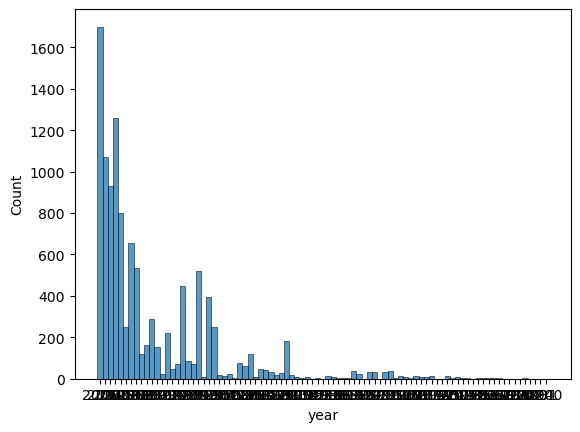

In [49]:
# Use your Python skills to create a visualization here.

sns.histplot(data=df, x="year")


<AxesSubplot:xlabel='year'>

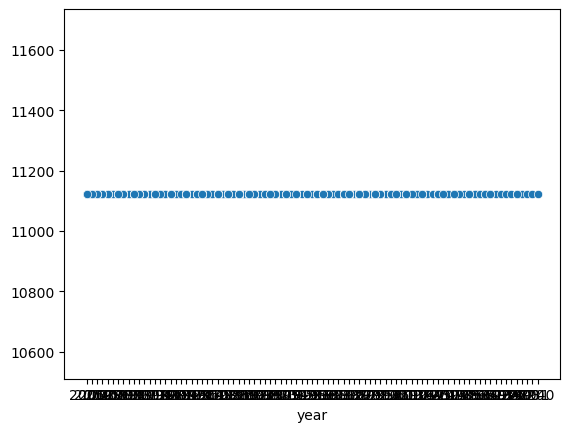

In [53]:
sns.scatterplot(data=df, x="year", y=df["year"].count())